In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [95]:
df = pd.read_pickle("vel_HR_ssh.pkl")

In [96]:
pd.Series(df["faults"].sum()).value_counts()

Machine_Misalignment.                                            185
Machine_Bearings_Loosness_and/or_Excessive_Clearance_Problem.     91
Machine_Bearings_Fault.                                           63
Pump_Flow_Problem.                                                58
Motor_Bearings_Fault.                                             58
Structural_Looseness.                                             57
Machine_Coupling_Problem.                                         50
Machine_Bearings_Lubrication_Problem.                             47
Motor_Bearings_Loosness_and/or_Excessive_Clearance_Problem.       39
Fan_Flow_Problem.                                                 31
Machine_Unbalance.                                                19
Motor_Bearings_Lubrication_Problem.                               18
Machine_Severe_Misalignment.                                      17
Motor_Electrical_Problem.                                         15
Machine_Belt_Problem.             

* Do exploratory analysis on the data (for example: How many times did fault 'Machine_Misalignment.' occur?)


In [97]:
i = 0
for row in df["faults"]:
    if "Machine_Misalignment." in row:
        i += 1
print(
    f"Number of times that Machine_Misalignment fault occurred in the data is {i} times"
)

Number of times that Machine_Misalignment fault occurred in the data is 185 times


* For each machine, what was the most common fault in it?

In [98]:
all_faults_of_this_machine = {f"{machine}": [] for machine in df["machine_name"]}

for machine in df["machine_name"].unique():
    for index, row in df.iterrows():
        if row["machine_name"] == machine:
            for fault in row["faults"]:
                all_faults_of_this_machine[machine].append(fault)

    print(
        f"The most faults that occur in '{machine}' is ",
        pd.Series(all_faults_of_this_machine[machine])[0],
        f"It occurrs {pd.Series(all_faults_of_this_machine[machine]).value_counts()[0]} times",
        "\n",
    )

    # Uncomment this to see the number of times each fault occurs in each machine
    # print(pd.Series(all_faults_of_this_machine[machine]).value_counts(),'\n\n')

The most faults that occur in 'mainfana-VHR' is  Machine_Misalignment. It occurrs 16 times 

The most faults that occur in 'mainfanb-VHR' is  Machine_Misalignment. It occurrs 13 times 

The most faults that occur in 'pumpa-VHR' is  Machine_Misalignment. It occurrs 17 times 

The most faults that occur in 'pumpb-VHR' is  Machine_Misalignment. It occurrs 18 times 

The most faults that occur in 'pumpc-VHR' is  Motor_Bearings_Fault. It occurrs 22 times 

The most faults that occur in 'recfan123-VHR' is  Machine_Misalignment. It occurrs 25 times 

The most faults that occur in 'recfan124a-VHR' is  Machine_Misalignment. It occurrs 21 times 

The most faults that occur in 'recfan124b-VHR' is  Machine_Coupling_Problem. It occurrs 23 times 

The most faults that occur in 'scrubberf1-VHR' is  Machine_Misalignment. It occurrs 7 times 

The most faults that occur in 'vacpump5.1302-VHR' is  Machine_Misalignment. It occurrs 12 times 

The most faults that occur in 'concvacpump6.1301A-VHR' is  Machi

/tmp/ipykernel_5133/3925730513.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"It occurrs {pd.Series(all_faults_of_this_machine[machine]).value_counts()[0]} times",
/tmp/ipykernel_5133/3925730513.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"It occurrs {pd.Series(all_faults_of_this_machine[machine]).value_counts()[0]} times",
/tmp/ipykernel_5133/3925730513.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"It occ

* Status count 

In [99]:
print(
    f" there is {df['status'].count()} statuses in the data , and there is {df['status'].nunique()} unique statuses  which are {df['status'].unique()} "
)

 there is 218 statuses in the data , and there is 4 unique statuses  which are ['hmv' 'l3' 'l2' 'l1'] 


* Are there any NaN values in the ts

In [100]:
np.any(np.isnan(df["ts"][0]))

False

* How many points are in each ts? Are all of them of the same length?

In [101]:
difference = 0
for i, ts in enumerate(df["ts"][0]):
    print(i, np.count_nonzero(ts))
    if i % 2 == 0:
        difference += np.count_nonzero(ts)
    else:
        difference -= np.count_nonzero(ts)
difference

0 8192
1 8192
2 8192
3 8192
4 8192
5 8192
6 8192
7 8192
8 8192
9 8192
10 8192
11 8192


0

* For each machine, you can try to do a bar chart to visualize the distribution of their status

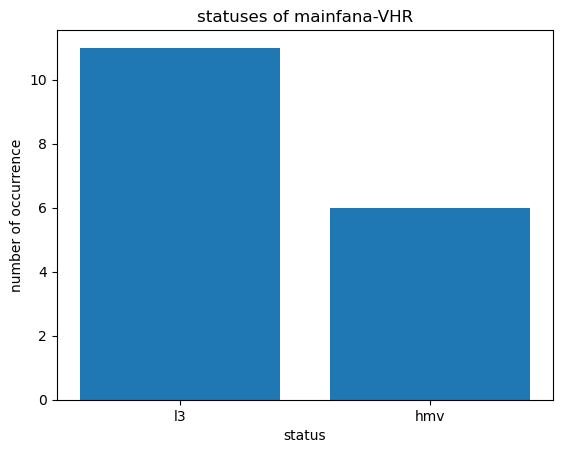

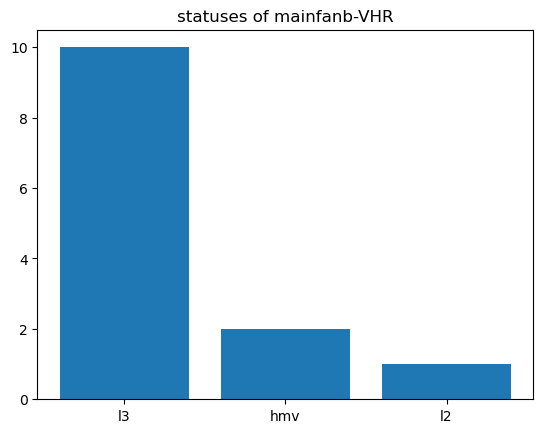

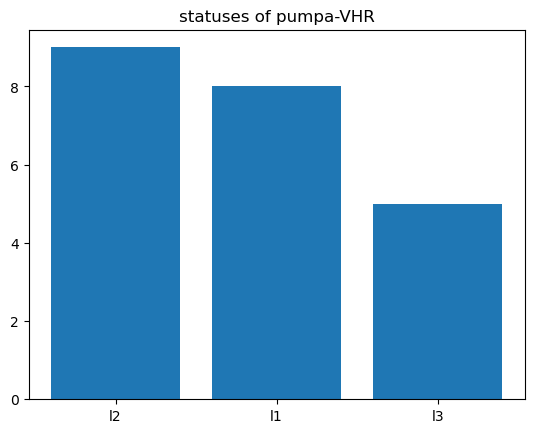

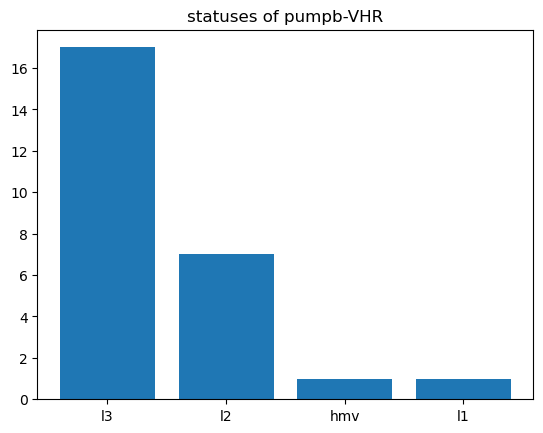

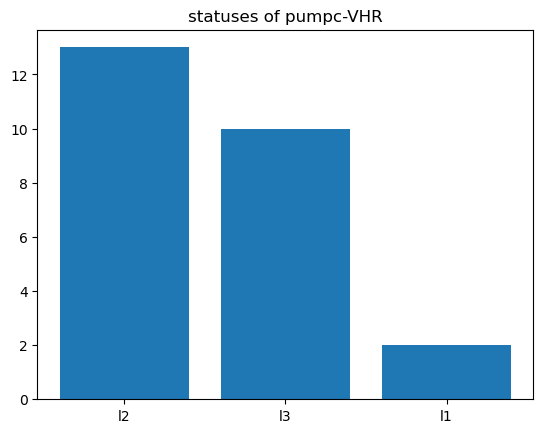

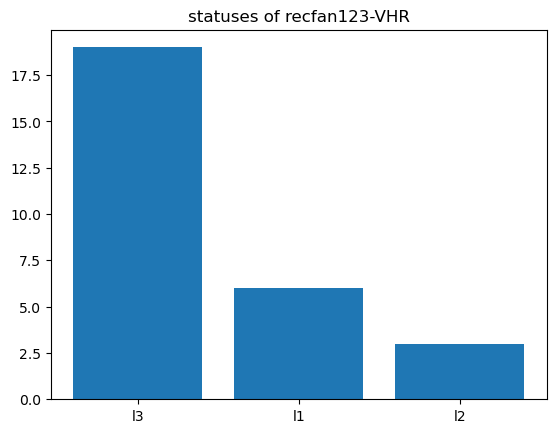

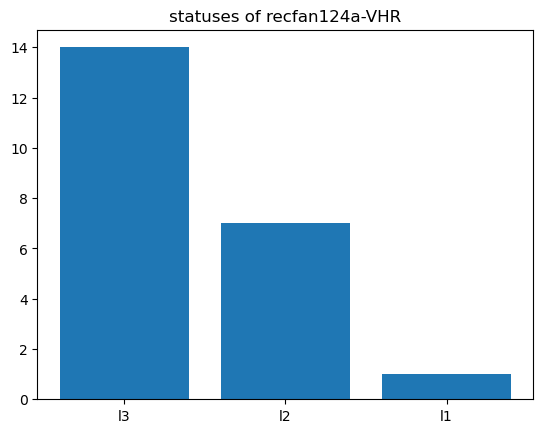

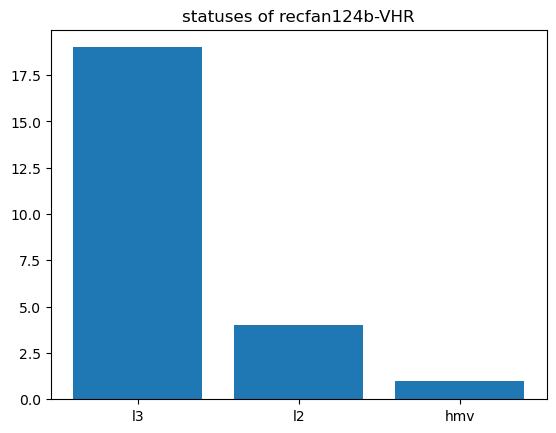

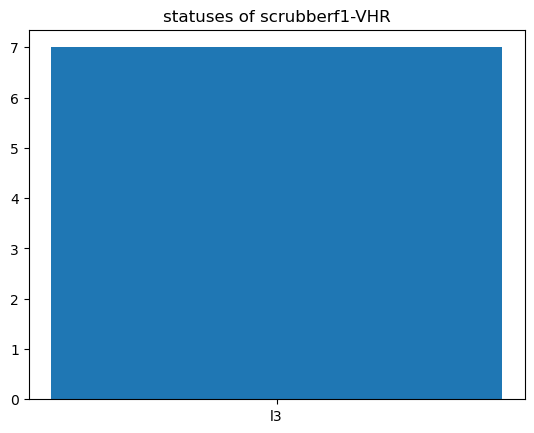

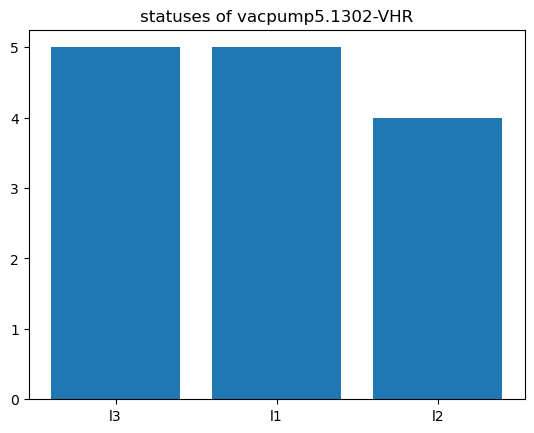

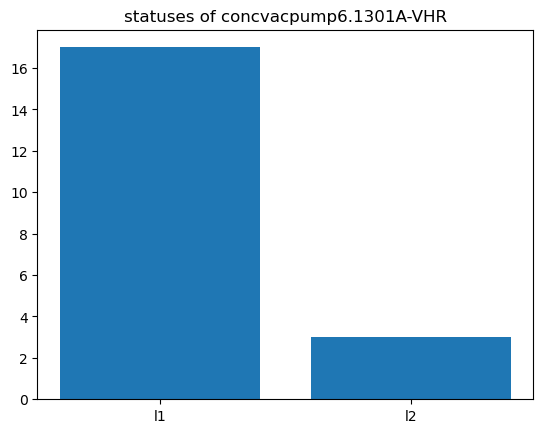

In [102]:
statuses_of_machines = {}
plt.xlabel("status")
plt.ylabel("number of occurrence")
for machine in df["machine_name"].unique():
    statuses_of_machines[machine] = []
    for i, row in df.iterrows():
        if row["machine_name"] == machine:
            statuses_of_machines[machine].append(row["status"])
    plt.title(f"statuses of {machine}")
    plt.bar(
        pd.Series(statuses_of_machines[machine]).value_counts().keys(),
        pd.Series(statuses_of_machines[machine]).value_counts().values,
    )
    plt.show()

* Status of the machine in each month

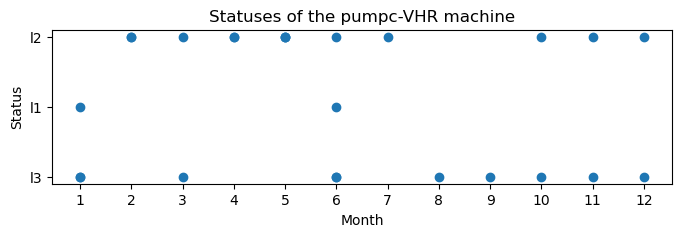

In [103]:
machine_name = "pumpc-VHR"  # name of the machine that you want to plot its statuses
plt.figure(figsize=(8, 2))
months = pd.to_datetime(
    [date for date in df[df["machine_name"] == machine_name]["report_date"]]
)
plt.plot_date(
    months.month[months == df[df["machine_name"] == machine_name]["report_date"]],
    df[df["machine_name"] == machine_name]["status"],
)
plt.xlabel("Month")
plt.ylabel("Status")
plt.gca().set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.gca().set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title(f"Statuses of the {machine_name} machine")
print()

* Status of the machine in each year

Text(0.5, 1.0, 'Statuses of the pumpc-VHR machine')

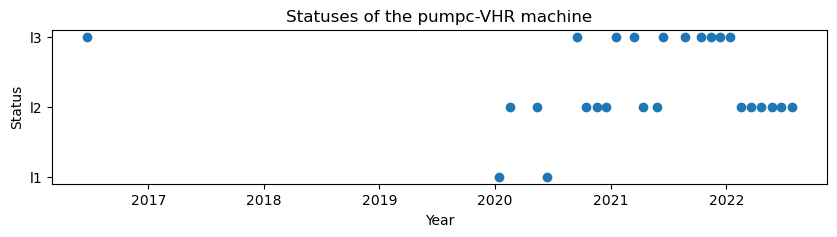

In [104]:
machine_name = "pumpc-VHR"  # name of the machine that you want to plot its statuses
plt.figure(figsize=(10, 2))
plt.plot_date(
    df[df["machine_name"] == machine_name].sort_values(by="status")["report_date"],
    df[df["machine_name"] == machine_name]["status"].sort_values(),
)
plt.xlabel("Year")
plt.ylabel("Status")
plt.title(f"Statuses of the {machine_name} machine")

* FFT calculator 

In [105]:
def FFT(ts):
    window = np.hanning(len(ts))
    windowed_data = ts * window

    # Compute the FFT
    fft_result = scipy.fft.fft(windowed_data)
    fft_freq = scipy.fft.fftfreq(len(fft_result))
    # plt.figure(figsize=(12,4))
    # plt.plot(fft_freq, np.abs(fft_result))

    return (fft_freq, fft_result)

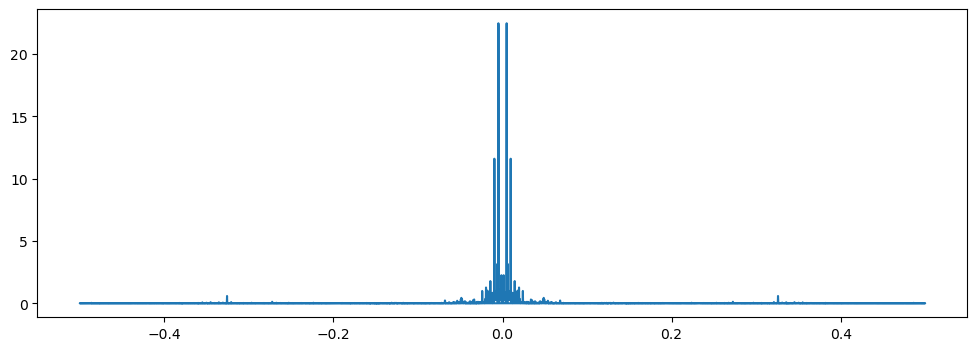

In [106]:
fft_freq, fft_result = FFT(df["ts"][0][0])
plt.figure(figsize=(12, 4))
plt.plot(fft_freq, np.abs(fft_result))
plt.show()

* A function that plots FFT and ts  for a specific  fault

In [107]:
def ts_and_fft_of(fault):
    for i, row in df.iterrows():
        if fault in row["faults"]:
            fft_freq, fft_result = FFT(row["ts"][1])
            plt.figure(figsize=(12, 4))
            plt.plot(fft_freq, np.abs(fft_result))
            plt.show()
            plt.figure(figsize=(12, 4))
            plt.plot(row["ts"][1])
            plt.show()
            break

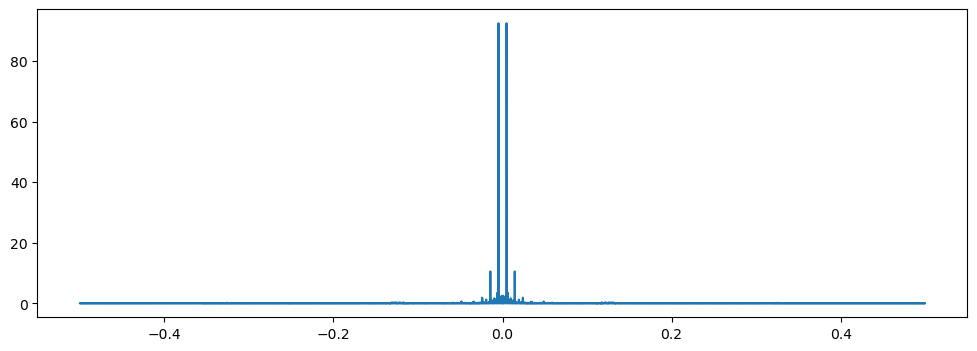

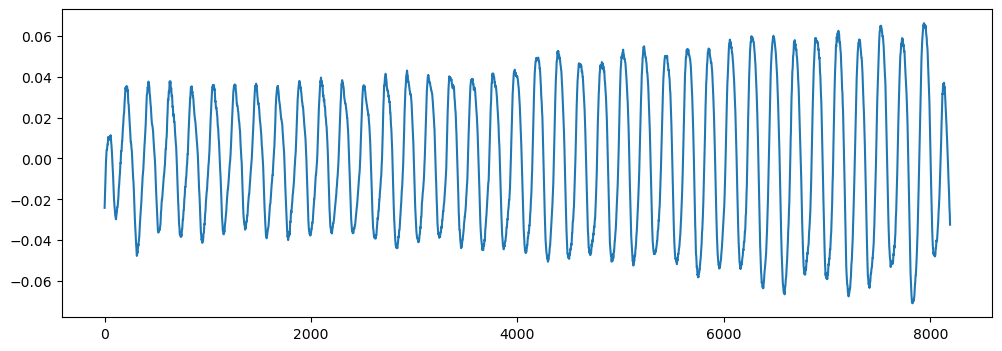

In [108]:
ts_and_fft_of("Machine_Misalignment.")

* Extracting some important features

In [109]:
df["mean"] = ""
df["std"] = ""
df["kurtosis"] = ""
df["skewness"] = ""
df["5_most_dominant_freq"] = ""

In [110]:
for i, row in df.iterrows():
    means = []
    for ts in row["ts"]:
        means.append(ts.mean())
    df["mean"][i] = means

In [111]:
for i, row in df.iterrows():
    std = []
    for ts in row["ts"]:
        std.append(ts.std())
    df["std"][i] = std

In [112]:
for i, row in df.iterrows():
    kurtosis = []
    for ts in row["ts"]:
        kurtosis.append(scipy.stats.kurtosis(ts))
    df["kurtosis"][i] = kurtosis

In [113]:
for i, row in df.iterrows():
    skewness = []
    for ts in row["ts"]:
        skewness.append(scipy.stats.skew(ts))
    df["skewness"][i] = skewness

In [114]:
for i, row in df.iterrows():
    dominant_frequencies = []
    for ts in row["ts"]:
        fft_freq, fft_result = FFT(ts)
        dominant_frequencies.append(fft_freq[np.argsort(np.abs(fft_result))[::-1][:5]])
    df["5_most_dominant_freq"][i] = dominant_frequencies

In [115]:
df.head()

,ts,status,faults,machine_name,report_date,portal_date,mean,std,kurtosis,skewness,5_most_dominant_freq
0,"[[-0.01095184, -0.011836081, -0.012565245, -0....",hmv,"[Machine_Misalignment., Machine_Bearings_Loosn...",mainfana-VHR,2022-01-20 00:00:00,2022-01-20 00:00:00,"[2.482756835937326e-07, 8.41135941992185e-05, ...","[0.009992200011012742, 0.034826481942814146, 0...","[-0.6479005583446948, -1.266915536500229, -0.7...","[0.25691951625664616, -0.003536674515816328, -...","[[0.0048828125, -0.0048828125, 0.0047607421875..."
1,"[[-0.018952877, -0.017712766, -0.015586316, -0...",hmv,"[Machine_Misalignment., Structural_Looseness.,...",mainfana-VHR,2022-05-16 00:00:00,2022-05-16 00:00:00,"[-6.533512845459025e-06, -1.8829610338134855e-...","[0.009377281735851083, 0.01896012813390538, 0....","[-1.1100767809527559, -1.0914420093701214, 0.0...","[0.1669537321497646, -0.041107439140732435, -0...","[[0.0048828125, -0.0048828125, 0.0047607421875..."
2,"[[-0.027835142, -0.025705064, -0.023463349, -0...",hmv,"[Machine_Misalignment., Structural_Looseness.,...",mainfana-VHR,2022-06-19 00:00:00,2022-06-19 00:00:00,"[-2.3567167261962866e-05, -9.837965834960953e-...","[0.009377694008590383, 0.022483886317161705, 0...","[-0.813658282121446, -1.343949579001577, -0.46...","[0.07783477897100198, 0.1353595419742197, -0.2...","[[0.0048828125, -0.0048828125, -0.004760742187..."
3,"[[-0.008443693, -0.008396786, -0.008454525, -0...",l3,"[Machine_Bearings_Lubrication_Problem., Machin...",mainfana-VHR,2021-01-21 00:00:00,2021-01-21 00:00:00,"[-8.70220745849629e-07, -7.50676191406265e-07,...","[0.00577222588166851, 0.004217530498808851, 0....","[-0.9253067249969935, -0.34248835536129985, -0...","[-0.37794479754688765, -0.6419717432060288, 0....","[[0.0048828125, -0.0048828125, -0.004760742187..."
4,"[[-0.001357752, -0.001582024, -0.001636926, -0...",l3,"[Machine_Misalignment., Machine_Bearings_Loosn...",mainfana-VHR,2021-11-25 00:00:00,2021-11-25 00:00:00,"[-1.2335372630615237e-05, -2.399630921630846e-...","[0.00526359014591806, 0.02907671079666755, 0.0...","[-0.14764802274607147, -1.2839427020164011, -0...","[-0.4777484310556099, 0.004730191867672347, -0...","[[-0.0048828125, 0.0048828125, 0.0047607421875..."
